In [1]:
import os
import torch
import pandas as pd
import numpy as np
import transformers
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import RobertaTokenizer, AutoModel, RobertaModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import sys
sys.path.append('/content/drive/MyDrive/skripsi')
!ls /content/drive/MyDrive/skripsi


check_lang.py	      data			 model				 __pycache__
cluster_sinta2.ipynb  finetuning_RoBERTa2.ipynb  Preprocessing_data_sinta.ipynb  src
cluster_sinta.ipynb   finetuning_RoBERTa.ipynb	 Preprocessing.py


In [2]:
from Preprocessing import preprocess_text

In [3]:
df = pd.read_csv('/content/drive/MyDrive/skripsi/data/data_sinta_cleaned2.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.head(500)

,jid,desc,title,date,journal,eissn
0,8,Belakangan ini Lembaga PAUD berbondong-bondong...,kemampuan bahasa inggris awal pada periode lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
1,8,The assessment process carried out in schools ...,strengthening early childhood learning outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
2,8,Kewajiban guru PAUD untuk memberikan layanan b...,eksplorasi deskriptif tentang layanan bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
3,8,Pandemi Covid-19 merambah sejak awal tahun 202...,perspektif orang tua terhadap pelaksanaan les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
4,8,Dalam upaya mencapai Sustainable Development G...,strategi pencegahan dan penanganan stunting mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
...,...,...,...,...,...,...
495,8,Anak usia 4-6 masa emas dimana masa sangat pen...,pengembangan multimedia interaktif tema alam s...,2020-10-16,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
496,8,Tujuan penelitian ini yaitu mendeskripsikan ba...,peran kepala lembaga taman kanakkanak dalam pe...,2023-10-15,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
497,8,Evaluasi membuahkan pengetahuan yang relevan d...,evaluasi cipp penerapan permendikbud dan tah...,2022-02-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959
498,8,The impact of Large-Scale Social Restrictions ...,the phenomenon of changes in student behavior ...,2023-06-18,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959


In [4]:
print(df.columns)

Index(['jid', 'desc', 'title', 'date', 'journal', 'eissn'], dtype='object')


In [5]:
title_unik = list(df.journal.unique())
title_unik

['JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI',
 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA',
 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION',
 'JURNAL BISNIS DAN AKUNTANSI',
 'JURNAL AKUNTANSI DAN KEUANGAN',
 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA',
 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE',
 'JURNAL KESEHATAN MASYARAKAT',
 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS',
 'JURNAL KESEHATAN ANDALAS',
 'E-JOURNAL OF CULTURAL STUDIES',
 'E-JURNAL AKUNTANSI']

In [6]:
df.desc[0]

'Belakangan ini Lembaga PAUD berbondong-bondong memberikan pembelajaran bahasa inggris bagi anak diperiode linguistik. Penelitian ini bertujuan untuk mengetahui kemampuan awal anak dalam mendengarkan dan mengucapkan kosakata bahasa inggris pada periode linguistic. Penelitian ini merupakan penelitian deskriptif dengan menggunakan pendekatan kuantitatif. Populasi penelitian ini mencakup anak pada Taman Kanak-Kanak. Selanjutnya peneliti melakukan penarikan sampling dengan teknik sampling jenuh dengan jumlah 28 Anak. Penelitian ini dilakukan pada bulan September 2022 - Maret 2023 dengan bekerjasama dengan guru kelas. Kegiatan pengumpulan data penelitian ini dilakukan melalui observasi, dengan model partisipatif. Adapun deskripsi hasil penelitian ini dibagi menjadi dua yakni kemampuan mendengarkan kosakata bahasa inggris awal yakni dengan kategori Mulai Berkembang. Selanjutnya, kemampuan mengucapkan kosakata bahasa inggris awal berada pada kategori Mulai Berkembang. Lebih lanjut hasil penel

In [7]:

df['jid_umum'] = df['jid']
df['jid_umum'].unique()


array([ 8,  9,  3, 12,  6, 10,  1,  7,  5, 11,  4,  2])

In [8]:
journal_id = {title_unik[i] : i + 1 for i in range(len(title_unik))}
df['jid'] = df.journal.apply(lambda x : journal_id[x])
df

,jid,desc,title,date,journal,eissn,jid_umum
0,1,Belakangan ini Lembaga PAUD berbondong-bondong...,kemampuan bahasa inggris awal pada periode lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959,8
1,1,The assessment process carried out in schools ...,strengthening early childhood learning outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959,8
2,1,Kewajiban guru PAUD untuk memberikan layanan b...,eksplorasi deskriptif tentang layanan bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959,8
3,1,Pandemi Covid-19 merambah sejak awal tahun 202...,perspektif orang tua terhadap pelaksanaan les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959,8
4,1,Dalam upaya mencapai Sustainable Development G...,strategi pencegahan dan penanganan stunting mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,2549-8959,8
...,...,...,...,...,...,...,...
9859,12,The purpose of this study to examine the effec...,pengaruh kinerja keuangan dana alokasi umum da...,2017-05-15,E-JURNAL AKUNTANSI,2302-8556,2
9860,12,The level of understanding of accounting to be...,pengaruh kecerdasan emosional kecerdasan intel...,2017-08-06,E-JURNAL AKUNTANSI,2302-8556,2
9861,12,The purpose of this study was to examine the i...,pengaruh ukuran perusahaan kompleksitas operas...,2017-02-15,E-JURNAL AKUNTANSI,2302-8556,2
9862,12,The purpose of this study is to determine the ...,kinerja dinas pariwisata bali berdasarkan kons...,2016-11-10,E-JURNAL AKUNTANSI,2302-8556,2


In [9]:
df.to_csv('/content/drive/MyDrive/skripsi/data/data_sinta_cleaned.csv', index=False)

In [10]:
'''
1 'JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI',
2 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA',
3 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION',
4 'JURNAL BISNIS DAN AKUNTANSI',
5 'JURNAL AKUNTANSI DAN KEUANGAN',
6 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA',
7 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE',
8 'JURNAL KESEHATAN MASYARAKAT',
9 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS',
10 'JURNAL KESEHATAN ANDALAS',
11 'E-JOURNAL OF CULTURAL STUDIES',
12 'E-JURNAL AKUNTANSI'
 '''


jurnal_id = 6


data_jid = df[df['jid']==jurnal_id]
data = data_jid['desc']
data

,desc
4122,Peningkatan kebutuhan bahan bakar minyak tidak...
4123,Rangka (frame) merupakan salah satu komponen y...
4124,Penelitian ini bertujuan untuk mengetahui frak...
4125,Penelitian ini bertujuan untuk mengetahui kese...
4126,Penelitian ini dilakukan untuk mengetahui vrak...
...,...
4271,"Plastik digunakan hampir oleh semua orang, pla..."
4272,"Dalam industri manufaktur modern, proses perpi..."
4273,Temperatur pendinginan konstan sangat dibutuhk...
4274,Kinerja mesin pengiris ubi kayu dapat diukur b...


In [11]:
class RobertaClassifier(nn.Module):
    def __init__(self, num_labels):
        super(RobertaClassifier, self).__init__()
        self.roberta = AutoModel.from_pretrained('roberta-base')
        self.classifier = nn.Sequential(
            nn.Linear(self.roberta.config.hidden_size, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_labels)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs['last_hidden_state']
        # x = self.classifier(x)
        return x

In [12]:
# Load pre-trained RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaClassifier(12)
model.load_state_dict(torch.load('/content/drive/MyDrive/skripsi/model/finetuned_model_roberta2.pt'))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [13]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Tokenize data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [14]:
# Create dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)


In [15]:
# Create dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [16]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

model.to(device)

# Set model to evaluation mode
model.eval()

RobertaClassifier(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [17]:
# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings.append(outputs.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [18]:
embeddings.shape

(154, 128, 768)

In [19]:
embeddings[0][0]

array([ 1.02500521e-01,  8.71119499e-01,  5.31233668e-01, -7.97125757e-01,
       -3.42787564e-01,  1.37175888e-01,  2.42627785e-01, -9.83098209e-01,
        2.15573072e+00,  2.57623047e-01, -2.39510700e-01, -1.24573290e+00,
        1.32506818e-01, -1.18522727e+00,  5.23614347e-01, -4.59109634e-01,
        3.23486507e-01, -4.29564983e-01,  2.45148826e+00,  1.17602706e+00,
       -3.70356083e-01, -1.40489340e+00,  8.10404241e-01, -3.76151204e-02,
       -2.11894482e-01, -4.45093125e-01,  6.16330028e-01, -5.96630335e-01,
        8.46797347e-01, -8.59442413e-01, -4.42265034e-01, -9.54764068e-01,
        5.83275437e-01,  3.60326141e-01, -1.00084674e+00,  1.48227632e-01,
       -5.38268328e-01, -2.12255254e-01, -8.01136613e-01, -6.07023001e-01,
        6.15963399e-01,  5.04746258e-01, -6.39991820e-01,  6.50393069e-01,
        3.79510164e-01,  6.43496141e-02, -2.69080073e-01, -2.51937896e-01,
        1.64482987e+00, -5.80508173e-01,  2.04367369e-01,  1.23038240e-01,
        2.04005558e-02,  

In [20]:
# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [21]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


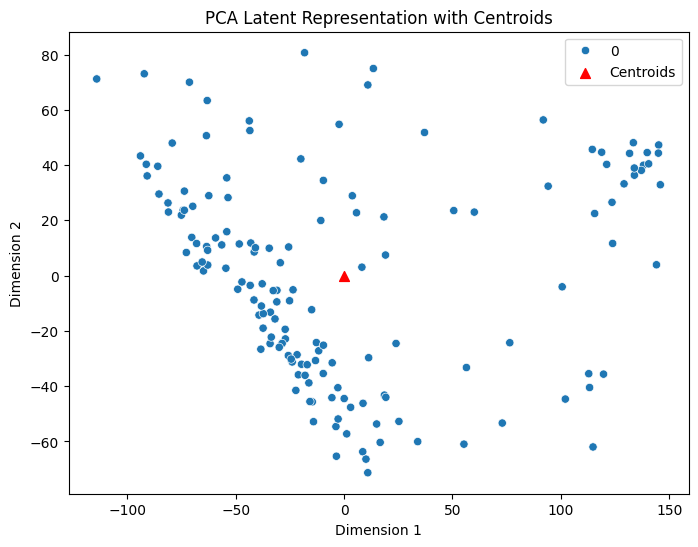

In [22]:
def plot_vector_distribution(vector_representation, kmeans_labels):
    # pca = PCA(n_components=2, random_state=0)
    # pca_result = pca.fit_transform(vector_representation)

    # df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca = pd.DataFrame(vector_representation, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        # centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroid = np.mean(vector_representation[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)

In [23]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

print(outscoop_threshold)

139.46845245361328


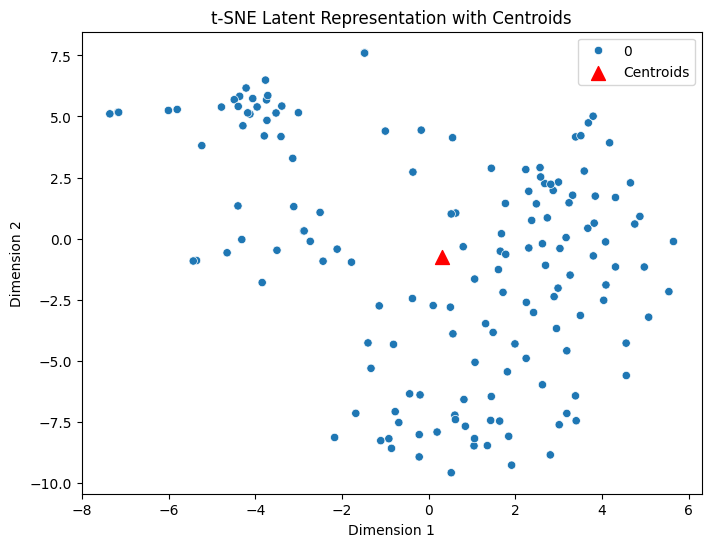

In [24]:
def plot_vector_distribution(vector_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_matrix)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')

    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings.reshape(embeddings.shape[0], -1), kmeans.labels_)

<ipython-input-25-f9d194638d11>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


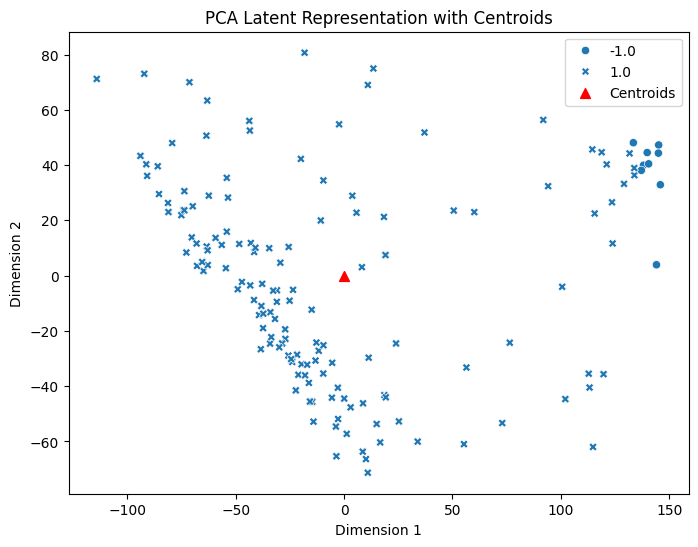

In [25]:
def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')

    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [26]:
# Assuming 'jurnal_id' is a variable containing the directory name
file_path = f"/content/drive/MyDrive/skripsi/src/finetuning_sinta2/{jurnal_id}"

if not os.path.exists(file_path):
  os.mkdir(file_path)

In [27]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df_res = pd.DataFrame({'Data': data,
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df_res[df_res['Label'] == 1]
outScoop_df = df_res[df_res['Label'] == -1]

df_res.to_csv(f'{file_path}/{jurnal_id}_data_jurnal.csv')
inScoop_df.to_csv(f'{file_path}/{jurnal_id}_inscoop_data_jurnal.csv')
outScoop_df.to_csv(f'{file_path}/{jurnal_id}_outscoop_data_jurnal.csv')

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)

Data dalam scoop:
                                                   Data  Label
4122  Peningkatan kebutuhan bahan bakar minyak tidak...    1.0
4123  Rangka (frame) merupakan salah satu komponen y...    1.0
4124  Penelitian ini bertujuan untuk mengetahui frak...    1.0
4125  Penelitian ini bertujuan untuk mengetahui kese...    1.0
4126  Penelitian ini dilakukan untuk mengetahui vrak...    1.0
...                                                 ...    ...
4271  Plastik digunakan hampir oleh semua orang, pla...    1.0
4272  Dalam industri manufaktur modern, proses perpi...    1.0
4273  Temperatur pendinginan konstan sangat dibutuhk...    1.0
4274  Kinerja mesin pengiris ubi kayu dapat diukur b...    1.0
4275  Seiring dengan peningkatan jumlah kendaraan, h...    1.0

[145 rows x 2 columns]

Data outscoop:
                                                   Data  Label
4127  Penelitian ini bertujuan untuk mengetahui hasi...   -1.0
4156  Penelitian ini bertujuan untuk: 1) Mengetahui ...   -1

In [29]:
# prompt: evaluasi hasil dengan coherence score berdasarkan kode diatas

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'inScoop_df' contains the in-scoop data
texts = inScoop_df['Data'].tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Calculate coherence score
coherence_score = np.mean(similarity_matrix)

print("Coherence Score:", coherence_score)


Coherence Score: 0.08015137671615881
